In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
O = pd.read_csv("TestData/OD.csv",header=None)

In [44]:
O = O[~O.isnull().any(axis=1)]

In [45]:
O[1]=1

In [46]:
O = O.replace(' ', np.nan)

In [47]:
O.loc[:,O.isnull().any()]

,2,84
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
36448,NaN,NaN
36449,NaN,NaN
36450,NaN,NaN
36451,NaN,NaN


In [76]:
Olbp = O.loc[:,:84]

In [53]:
MP = pd.read_csv("TestData/MP.csv",header=None)

In [55]:
MP = MP[~MP.isnull().any(axis=1)]

In [56]:
MP[1]=2

In [57]:
MP = MP.replace(' ', np.nan)

In [77]:
MPlbp = MP.loc[:,:84]

In [78]:
read_ids = np.append(O[1],MP[1])

In [79]:
read_ids

array([1, 1, 1, ..., 2, 2, 2])

In [80]:
Olbp = Olbp.dropna(axis=1).drop(columns=[0,1])

In [81]:
MPlbp = MPlbp.dropna(axis=1).drop(columns=[0,1])

In [82]:
m = pd.concat([Olbp,MPlbp])

In [93]:
reducer = umap.UMAP(n_neighbors=100)

In [94]:
embedding = reducer.fit_transform(m)

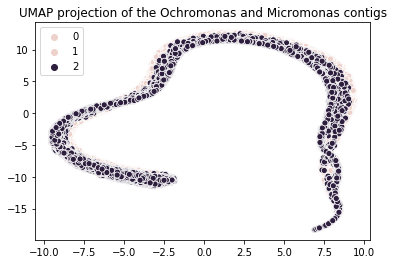

In [97]:
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],hue= read_ids)
plt.title('UMAP projection of the Ochromonas and Micromonas contigs', fontsize=12);

In [2]:
t = pd.read_csv("TestData/test.csv",header=None)

In [3]:
t = t[~t.isnull().any(axis=1)]

In [4]:
t = t.replace(' ', np.nan)

In [5]:
t.loc[:,t.isnull().any()]

,2,1362
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
12994,NaN,NaN
12995,NaN,NaN
12996,NaN,NaN
12997,NaN,NaN


In [105]:
tlbp = t.loc[:,3:1362].dropna(axis=1)

In [106]:
tlbp

,3,4,5,6,7,8,9,10,11,12,...,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361
0,51,40,153,70,47,13,19,156,9,7,...,2,0,1,0,1,1,2,2,1,94
1,120,133,255,149,163,43,19,267,46,16,...,4,6,3,3,2,0,6,0,4,140
2,133,116,352,162,165,42,23,380,10,16,...,2,6,5,1,5,5,2,6,4,187
3,44,39,163,69,54,9,25,168,15,13,...,0,0,0,0,0,0,0,0,0,136
4,81,89,178,99,117,27,19,192,26,8,...,6,0,1,4,0,1,2,0,2,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,1395,1633,4099,1753,2035,451,361,4441,367,233,...,43,55,49,44,55,72,45,43,43,2271
12995,1584,1874,4923,2024,2340,519,472,5297,416,260,...,32,51,41,43,59,57,48,46,48,2838
12996,1985,2212,6035,2533,2830,696,516,6506,452,276,...,30,39,46,49,58,54,43,28,45,3773
12997,2147,2483,6660,2745,3140,726,583,7120,513,338,...,58,58,45,50,73,60,59,62,50,4032


In [107]:
labels = np.zeros(tlbp.shape[0])

In [108]:
labels[:5001] = 1

In [109]:
labels[5001:10001] = 2

In [110]:
labels = labels.tolist()

In [111]:
labels = [int(i) for i in labels]

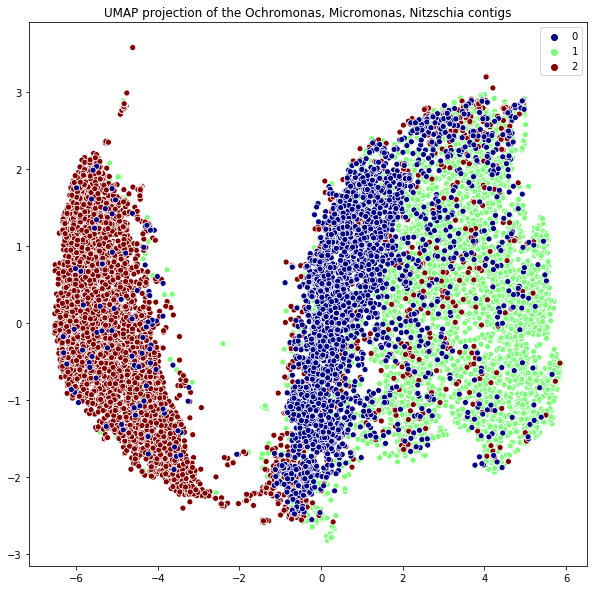

In [112]:
from mpl_toolkits.mplot3d import Axes3D
reducer = umap.UMAP(n_components=2,metric="correlation",min_dist=0, n_neighbors=20)
u = reducer.fit_transform(tlbp)

plt.figure(figsize=(10,10))
sns.scatterplot(x=u[:, 0], y=u[:, 1], hue=labels, palette = 'jet')
plt.title('UMAP projection of the Ochromonas, Micromonas, Nitzschia contigs', fontsize=12);

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 720x720 with 0 Axes>

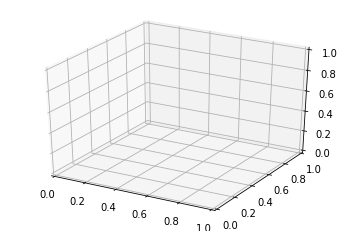

In [267]:
# Need to make a nice bokeh plot instead
plt.figure(figsize=(10,10))
fig = plt.figure()    
ax = fig.add_subplot(111, projection='3d')
ax.scatter(u[:,0], u[:,1], u[:,2], c=labels, s=100)

In [211]:
u = TSNE(n_components=2,perplexity=100).fit_transform(tlbp)

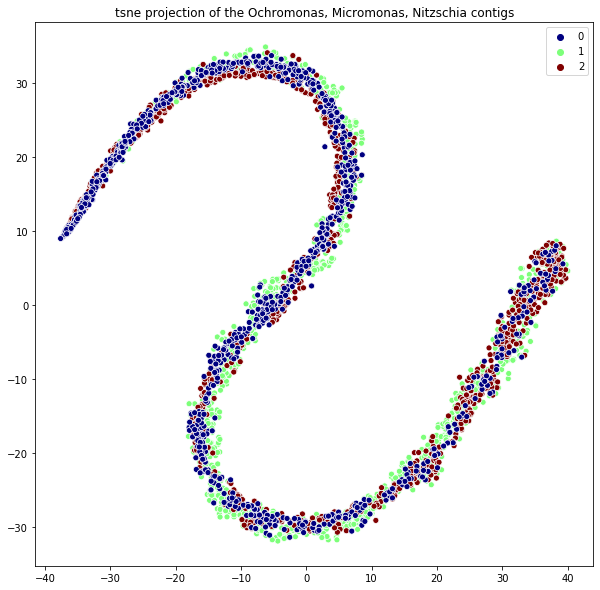

In [212]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=u[:, 0], y=u[:, 1], hue=labels, palette = 'jet')
plt.title('tsne projection of the Ochromonas, Micromonas, Nitzschia contigs', fontsize=12);

In [15]:
import hdbscan

In [85]:
clusterer = hdbscan.HDBSCAN(alpha=20.)
clusterer.fit(u)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=20.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

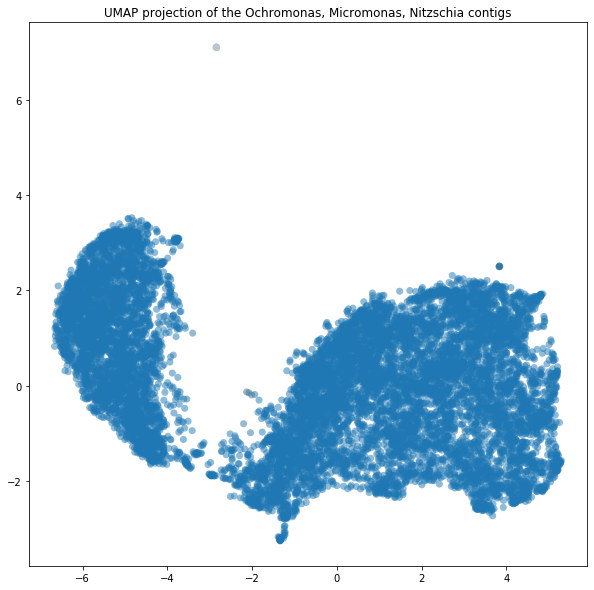

In [86]:
plt.figure(figsize=(10,10))
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.1, 0.1, 0.1)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*u.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.5)
plt.title('UMAP projection of the Ochromonas, Micromonas, Nitzschia contigs', fontsize=12);

In [87]:
from sklearn.cluster import DBSCAN

In [102]:
clustering = DBSCAN(eps=0.2, min_samples=2).fit(u)

In [103]:
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0])

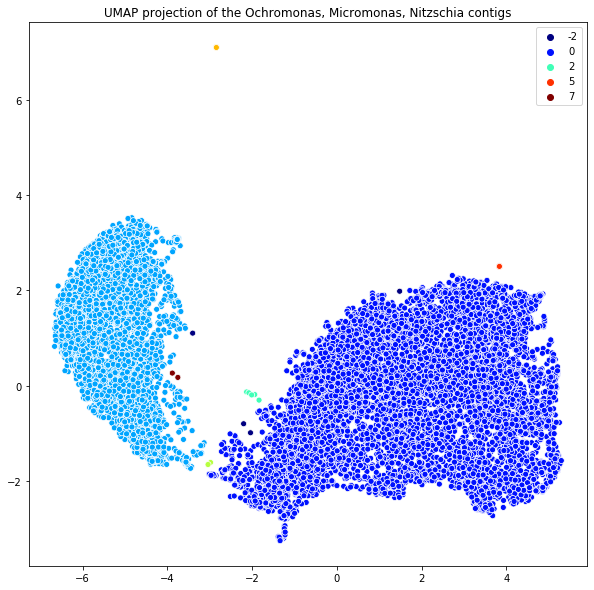

In [104]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=u[:, 0], y=u[:, 1], hue=clustering.labels_, palette = 'jet')
plt.title('UMAP projection of the Ochromonas, Micromonas, Nitzschia contigs', fontsize=12);